<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/6_Lagrange_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lagrange interpolation

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences. https://doi.org/10.1016/j.cageo.2021.105007.
<br>
<br>

####Lagrange polynomial

Given a set of distinct $n\,+\,1$ data points in $\mathbb{R}^{2}\,(x_0,\,y_0),\,(x_1,\,y_1)\dots(x_n,\,y_n)$ we can define their *Lagrange polynomial interpolator* as:
<br>
<br>
\begin{equation}
  P\,(x)
  \,=\,\sum_{i\,=\,0}^{n} y_i\,l_i\,(x),
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{equation}
  l_{i}\,(x)
  \,=\,\prod_{j\,=\,0\\j\,\ne\,i}^{n} \frac{x\,-\,x_j}{x_i\,-\,x_j}
  \,=\,\frac{x\,-\,x_0}{x_i\,-\,x_0} \frac{x\,-\,x_1}{x_i\,-\,x_1}\dots\frac{x\,-\,x_n}{x_i\,-\,x_n}
\end{equation}
<br>
<br>
Besides, from the definition above, it follows that:
<br>
<br>
\begin{equation}
  S\,(x)
  \,=\,\sum_{i\,=\,0}^{n} l_i\,(x)\,=\,1
\end{equation}
<br>
<br>

In [ ]:
def lagrange (x, xn):
  """
  Creates the Lagrage polynomials
  """
  N = x.size
  n = xn.size

  L = np.ones ((n, N))

  for i in range (n):

    for j in range (n):

      if i != j:

        L[i] *= (x - xn[j]) / (xn[i] - xn[j])

  return L


def lagInt1D (x, xn, yn):
  """
  Interpolates a 1D set of points
  using Lagrange polynomials
  """
  N = x.size
  n = xn.size

  L = lagrange (x, xn)

  y = np.zeros (N)

  for i in range (n):

    y += yn[i] * L[i]

  return y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the parameters below

# N: number of points

# xn: nodes x values
# yn: nodes y values

if __name__ == "__main__":

  N = 1000

  xn = np.array ([0.0, 1.0, 2.0, 3.0, 4.0])
  yn = np.array ([3.1, 1.7, 2.5, 2.9, 2.6])

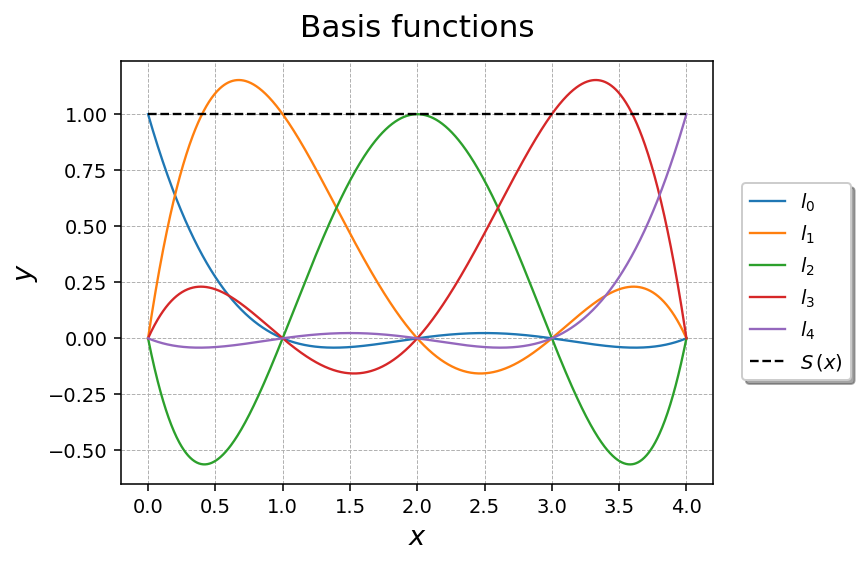

In [ ]:
if __name__ == "__main__":

  x = np.linspace (xn[0], xn[-1], N)

  L = lagrange (x, xn)
  S = lagInt1D (x, xn, np.ones (xn.size))

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for i in range (len (L)):

    plt.plot (x, L[i], linewidth = 1.2,
              label = r'$l_{{{}}}$'.format (i))

  plt.plot (x, S, color = 'black', linestyle = 'dashed',
            linewidth = 1.2, label = r'$S\,(x)$')
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('Basis functions', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

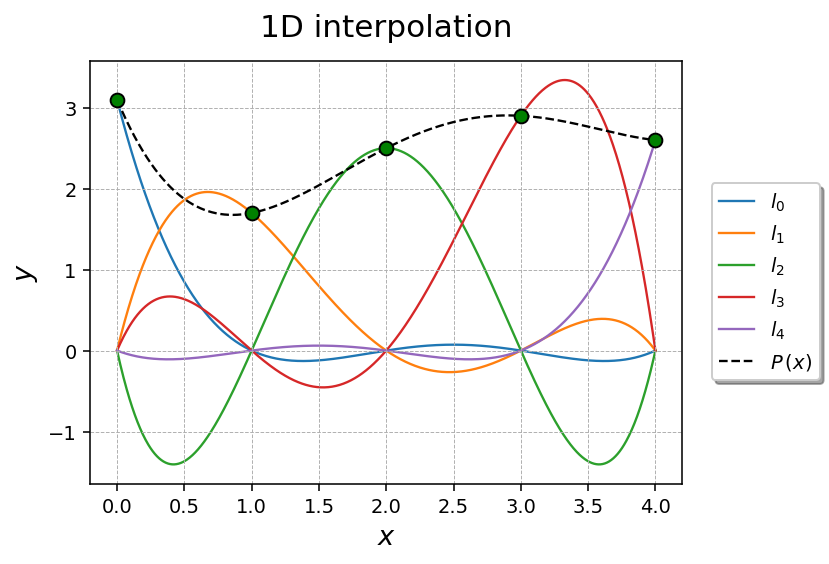

In [ ]:
if __name__ == "__main__":

  x = np.linspace (xn[0], xn[-1], N)

  L = lagrange (x, xn)
  P = lagInt1D (x, xn, yn)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for i in range (len (L)):

    plt.plot (x, yn[i] * L[i], linewidth = 1.2,
              label = r'$l_{{{}}}$'.format (i), zorder = 1)

  plt.plot (x, P, color = 'black', linestyle = 'dashed',
            linewidth = 1.2, label = r'$P\,(x)$', zorder = 2)
  plt.scatter (xn, yn, marker = 'o', s = 50, facecolor = 'green',
               edgecolor = 'black', linewidth = 1, zorder = 3)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('1D interpolation', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####2D interpolation

Given a set of $(m\,+\,1)(n\,+\,1)$ points in $\mathbb{R}^{3}\,(x_{00},\,y_{00},\,z_{00}),\,(x_{01},\,y_{01},\,z_{01})\dots(x_{m\,-\,1n},\,y_{m\,-\,1n},\,z_{m\,-\,1n})\,(x_{mn},\,y_{mn},\,z_{mn})$ such as their coordinates are linearly independent from one another, we can calculate a 2D *Lagrange interpolator* via tensor products of the 1D *Lagrange polynomials*:
<br>
<br>
\begin{equation}
  P\,(x,\,y)
  \,=\,\sum_{i\,=\,0}^{m}\sum_{j\,=\,0}^{n} z_{ij}\,l_i\,(x)\,l_j\,(y)
\end{equation}
<br>
<br>

In [ ]:
def lagInt2D (x, y, xn, yn, Zn):
  """
  Interpolates a 2D set of points
  using Lagrange polynomials
  """
  Nx = x.size
  Ny = y.size

  m, n = Zn.shape

  Lx = lagrange (x, xn)
  Ly = lagrange (y, yn)

  Lx.shape = (m, Nx, 1)
  Ly.shape = (n, 1, Ny)

  zz = np.zeros ((Nx, Ny))

  for i in range (m):

    for j in range (n):

      zz += Zn[i, j] * Lx[i] * Ly[j]

  return zz

In [ ]:
# Set the parameters below

# Nx: number of points in the x direction
# Ny: number of points in the y direction

# xn: nodes x values
# yn: nodes y values
# Zn: nodes z values for all (x, y) combinations

if __name__ == "__main__":

  Nx = 200
  Ny = 200

  xn = np.array ([0.0, 1.0, 2.0, 3.0, 4.0])
  yn = np.array ([3.0, 4.0, 5.0, 6.0, 7.0])

  Zn = np.array ([[3.1, 1.7, 2.5, 2.9, 2.6],
                  [2.8, 1.9, 2.1, 2.7, 2.6],
                  [2.5, 2.3, 2.2, 2.7, 2.9],
                  [2.2, 2.6, 2.5, 2.4, 3.1],
                  [2.0, 2.7, 3.1, 2.0, 3.0]])

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

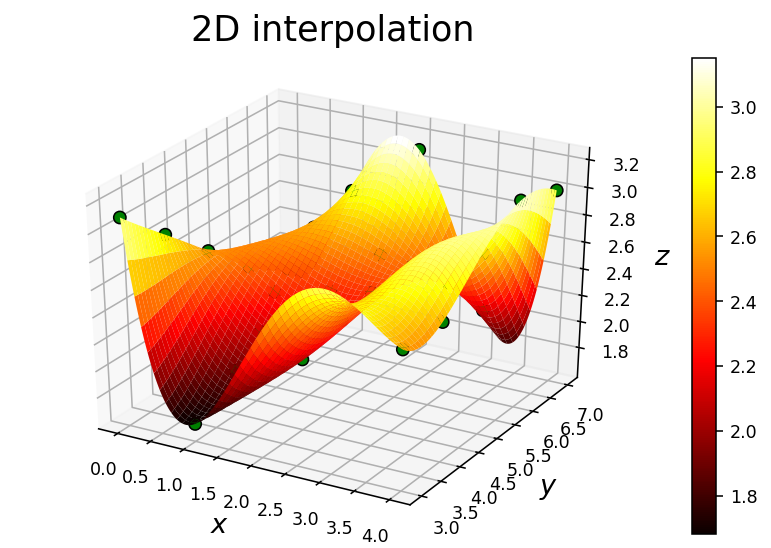

In [ ]:
if __name__ == "__main__":

  x = np.linspace (xn[0], xn[-1], Nx)
  y = np.linspace (yn[0], yn[-1], Ny)

  xx, yy = np.meshgrid (x, y)
  
  zz = lagInt2D (x, y, xn, yn, Zn)

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.gca (projection = '3d')

  surf = ax.plot_surface (xx, yy, zz, cmap = cm.hot, zorder = 1)
  
  Xn, Yn = np.meshgrid (xn, yn)

  ax.scatter (Xn, Yn, Zn, marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()


The same idea can be generalized to any number of dimensions for interpolating a set of data points in $\mathbb{R}^{n}$.
<br>
<br>

####References

“Lagrange Interpolating Polynomial.” From Wolfram MathWorld, mathworld, https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html [Accessed 4 August 2020].
<br>
<br>
“Lagrange polynomial.” *Wikipedia*, Wikimedia Foundation, 24 Jun. 2020, https://en.wikipedia.org/wiki/Lagrange_polynomial [Accessed 3 August 2020].
<br>
<br>
Schuberth, B. (2003). *The spectral element method for seismic wave propagation.* (Doctoral dissertation, Master’s thesis, Ludwigs-Maximilians-Universität Munchen).